In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
# from fit import likelihood, stat_fit
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# NEF models vs human choices

missing model-RL sid 24


/tmp/ipykernel_112711/771944440.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))


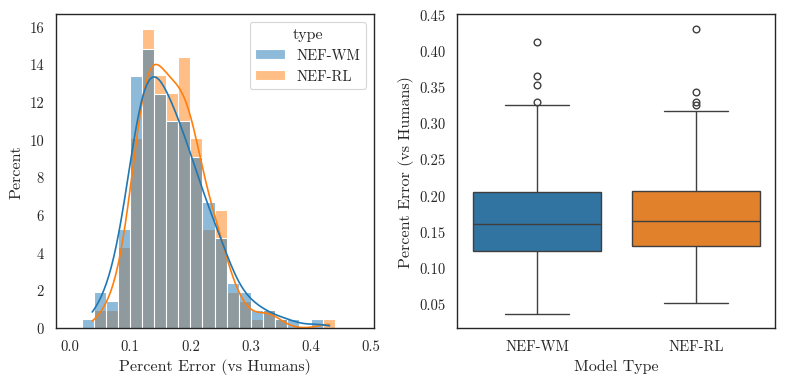

In [10]:
WM = pd.read_pickle(f"data/WM_z05k12.pkl").query("type=='model-WM'")
RL = pd.read_pickle(f"data/RL_z05k12.pkl").query("type=='model-RL'")
combined = pd.concat([WM, RL], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'percent error']
for model_type in combined['type'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("type==@model_type & sid==@sid")
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing {model_type} sid {sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        type_label = "NEF-WM" if model_type=='model-WM' else "NEF-RL"
        df = pd.DataFrame([[type_label, sid, percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
sns.histplot(reduced, x='percent error', hue='type', ax=axes[0], palette=palette[:2], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(reduced, x='type', y='percent error', hue='type', ax=axes[1], palette=palette[:2])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="Model Type", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/nef_errors.png", dpi=600)

# NEF models (+probablistic choice) vs Statistical Models

### fits

In [23]:
fitted_data, fitted_params = stat_fit("DGrds", 3, save=False)

In [24]:
print(fitted_data)
print(fitted_params)

    type  sid        NLL  McFadden R2
0  DGrds    3  45.168889     0.592719
[1.         3.50009043 6.49983698 7.70964308]


In [25]:
human = pd.read_pickle(f"data/human.pkl")
# print(human)
print(human.query('sid==1'))
rl1 = pd.read_pickle(f"data/RL1_1_rerun.pkl")
print(rl1.query('sid==1'))
rl1_perf = pd.read_pickle(f"data/RL1_1_performance.pkl")
print(rl1_perf)

     sid  trial  network  stage  who  color  degree       RD  action
0      1      1        9      0    2      1       3  0.00000       1
1      1      1        9      1    6     -1       3  0.23077       1
2      1      1        9      1    5     -1       3  0.23077       1
3      1      1        9      1    7      1       4  0.30769       1
4      1      1        9      2    5     -1       3  0.23077      -1
..   ...    ...      ...    ...  ...    ...     ...      ...     ...
377    1     39       30      3    4      1       4  0.25000       1
378    1     40        6      0    1      1       1  0.00000       1
379    1     40        6      1    7     -1       5  0.83333      -1
380    1     40        6      2    7     -1       5  0.83333      -1
381    1     40        6      3    7     -1       5  0.83333      -1

[382 rows x 9 columns]
    type  sid  trial  network  stage  who  color  degree       RD  action
0    RL1    1      1        9      0    2      1       3  0.00000       1


In [ ]:
start = time.time()
model_type = "DGrds"
sids = pd.read_pickle(f"data/behavior.pkl")['sid'].unique()
dfs = []
for sid in sids:
    print(sid)
    fitted_data, fitted_params = stat_fit(model_type, sid, save=False)
    dfs.append(fitted_data)
fitted = pd.concat(dfs, ignore_index=True)
fitted.to_pickle(f"data/fitted_{model_type}.pkl")
end = time.time()
print(f"runtime {(end-start)/60:.4} min")

### Compare Log-Likelihood and McFadden R-squared across all subjects and all models

In [ ]:
fitted_NEF_WM = pd.read_pickle(f"data/NEF-WM_r2.pkl")
fitted_NEF_RL = pd.read_pickle(f"data/NEF-RL_r2.pkl")
fitted_RL1 = pd.read_pickle(f"data/RL1_r2.pkl")
fitted_RL2 = pd.read_pickle(f"data/RL2_r2.pkl")
fitted_RL2rd = pd.read_pickle(f"data/RL2rd_r2.pkl")
fitted_ZK = pd.read_pickle(f"data/ZK_r2.pkl")
fitted_DGn = pd.read_pickle(f"data/DGn_r2.pkl")
fitted_DGrd = pd.read_pickle(f"data/DGrd_r2.pkl")
fitted_DGrds = pd.read_pickle(f"data/DGrds_r2.pkl")
combined = pd.concat([fitted_RL1, fitted_RL2, fitted_RL2rd, fitted_ZK, fitted_DGn, fitted_DGrd, fitted_DGrds, fitted_NEF_WM, fitted_NEF_RL], ignore_index=True)

In [2]:
A = pd.read_pickle(f"data/NEF-WM_r2.pkl")
B = pd.read_pickle(f"data/NEF-RL_r2.pkl")
C = pd.read_pickle(f"data/RL1_three.pkl")
D = pd.read_pickle(f"data/RL3_three.pkl")
E = pd.read_pickle(f"data/RL3rd_three.pkl")
F = pd.read_pickle(f"data/ZK_three.pkl")
G = pd.read_pickle(f"data/DGn_three.pkl")
H = pd.read_pickle(f"data/DGrds_three.pkl")
combined = pd.concat([C,D,E,F,G,H,A,B], ignore_index=True)

In [3]:
combined = pd.read_pickle("data/all_scipy_performance.pkl")

In [4]:
combined

,type,sid,NLL,McFadden R2
0,RL1,1,51.811849,None
1,RL3rd,1,42.565640,None
2,DGn,1,48.207068,None
3,DGrds,1,46.174158,None
4,ZK,1,44.024668,None
...,...,...,...,...
1457,DGn,224,64.781843,None
1458,DGrds,224,64.854655,None
1459,ZK,224,46.240566,None
1460,NEF-WM,224,54.729163,None


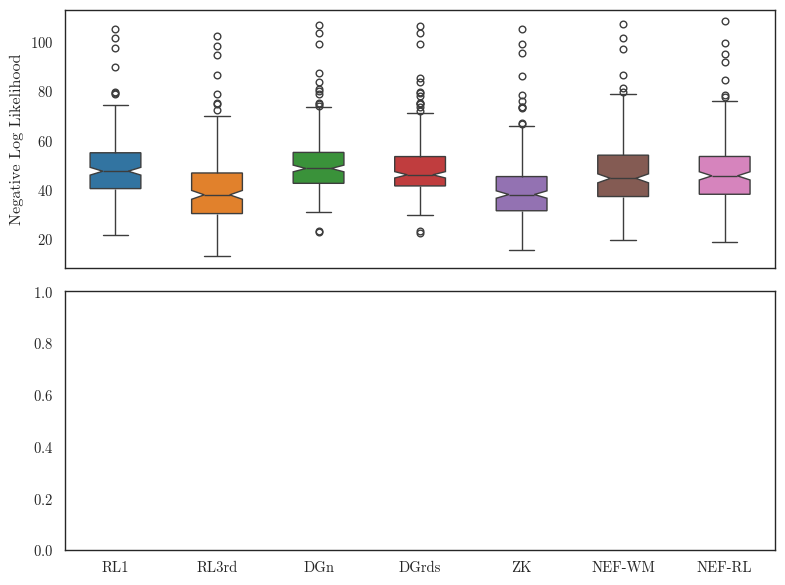

In [6]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,6), sharex=True)
bins = np.arange(0, 150, 5)
types = combined['type'].unique()
sns.boxplot(combined, x='type', y='NLL', hue='type', ax=axes[0], palette=palette[:len(types)],
           notch=True, width=0.5)
# sns.boxplot(combined, x='type', y='McFadden R2', hue='type', ax=axes[1], palette=palette[:len(types)],
#            notch=True, width=0.5)
axes[0].set(xlabel=None, ylabel='Negative Log Likelihood') 
# axes[1].set(xlabel=None, ylabel=r'McFadden $R^2$') 
plt.tight_layout()
fig.savefig("plots/fitted_scipy.png", dpi=600)

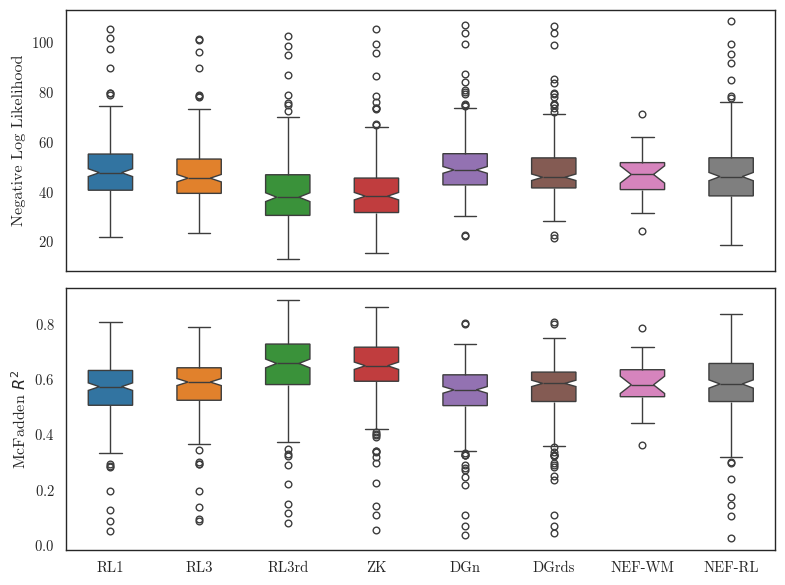

In [3]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,6), sharex=True)
bins = np.arange(0, 150, 5)
types = combined['type'].unique()
sns.boxplot(combined, x='type', y='NLL', hue='type', ax=axes[0], palette=palette[:len(types)],
           notch=True, width=0.5)
sns.boxplot(combined, x='type', y='McFadden R2', hue='type', ax=axes[1], palette=palette[:len(types)],
           notch=True, width=0.5)
axes[0].set(xlabel=None, ylabel='Negative Log Likelihood') 
axes[1].set(xlabel=None, ylabel=r'McFadden $R^2$') 
plt.tight_layout()
fig.savefig("plots/fitted.png", dpi=600)

/tmp/ipykernel_65792/3689480599.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,6), sharex=True)


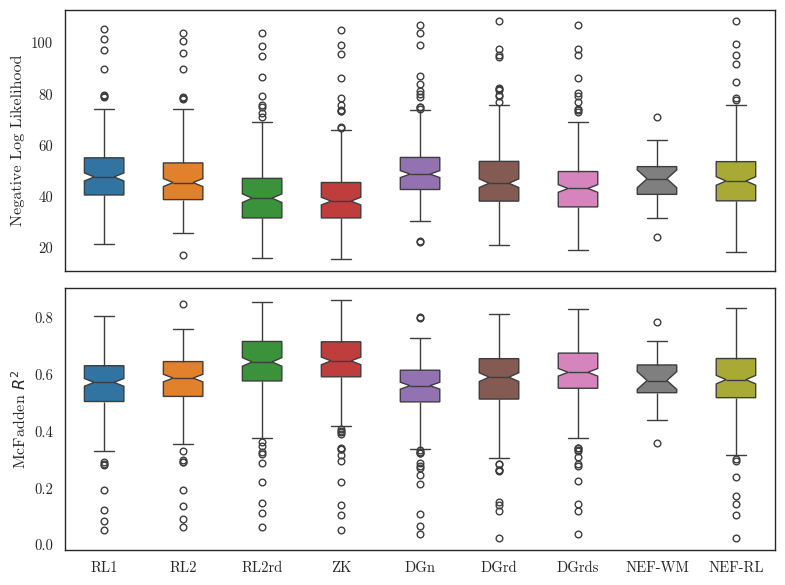

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,6), sharex=True)
bins = np.arange(0, 150, 5)
types = combined['type'].unique()

# sns.histplot(combined, x='NLL', hue='type', ax=axes[0], palette=palette[:len(types)],
#              stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(combined, x='type', y='NLL', hue='type', ax=axes[0], palette=palette[:len(types)],
           notch=True, width=0.5)
sns.boxplot(combined, x='type', y='McFadden R2', hue='type', ax=axes[1], palette=palette[:len(types)],
           notch=True, width=0.5)

# axes[0].set(xlabel="Negative Log Likelihood", title="Performance Across Subjects") 
axes[0].set(xlabel=None, ylabel='Negative Log Likelihood') 
axes[1].set(xlabel=None, ylabel=r'McFadden $R^2$') 
plt.tight_layout()
fig.savefig("plots/fitted.png", dpi=600)

### Calculate the frequency that each model produces the best fit across all subjects

In [45]:
sids = combined['sid'].unique()
types = combined['type'].unique()

freqs = {}
for model_type in types:
    freqs[model_type] = {'NLL': 0, 'R2': 0}

for sid in sids:
    subdata = combined.query("sid==@sid")
    # Find the index of the row with the minimum value in column 'NLL' or 'McFadden R2'
    nll_min_idx = subdata['NLL'].idxmin()
    r2_min_idx = subdata['McFadden R2'].idxmax()
    # Retrieve the row corresponding to this index
    nll_min_row = subdata.loc[nll_min_idx]
    r2_min_row = subdata.loc[r2_min_idx]
    # Retrieve the model type
    nll_best_type = nll_min_row['type']
    r2_best_type = r2_min_row['type']
    freqs[nll_best_type]['NLL'] += 1
    freqs[r2_best_type]['R2'] += 1

dfs = []
columns = ['type', 'freq best NLL', 'freq best R2']
for model_type in types:
    df = pd.DataFrame([[model_type, freqs[model_type]['NLL']/len(sids), freqs[model_type]['R2']/len(sids)]], columns=columns)
    dfs.append(df)
freq_best_data = pd.concat(dfs, ignore_index=True)
freq_best_data.to_pickle(f"data/freq_best_data.pkl")

In [17]:
# dfs = []
# columns = ['sid', 'best NLL', 'best R2']
# sids = combined['sid'].unique()
# for sid in sids:
#     subdata = combined.query("sid==@sid")
#     # Find the index of the row with the minimum value in column 'NLL' or 'McFadden R2'
#     nll_min_idx = subdata['NLL'].idxmin()
#     r2_min_idx = subdata['McFadden R2'].idxmin()
#     # Retrieve the row corresponding to this index
#     nll_min_row = subdata.loc[nll_min_idx]
#     r2_min_row = subdata.loc[r2_min_idx]
#     # Retrieve the model type
#     nll_best_type = nll_min_row['type']
#     r2_best_type = r2_min_row['type']
#     df = pd.DataFrame([[sid, nll_best_type, r2_best_type]], columns=columns)
#     dfs.append(df)
# freq_best_data = pd.concat(dfs, ignore_index=True)
# freq_best_data.to_pickle(f"data/freq_best_data.pkl")

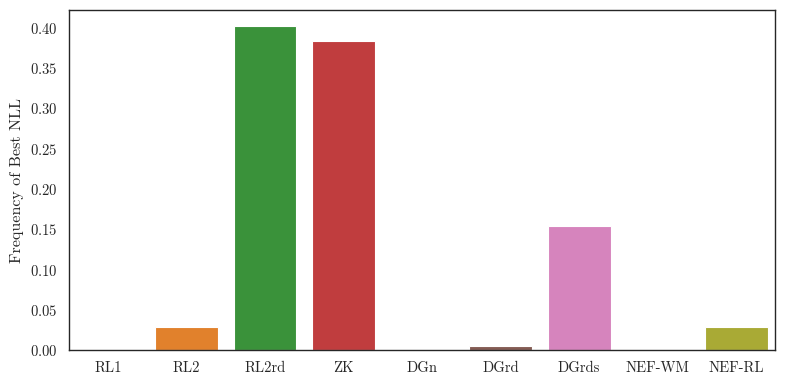

In [52]:
order = freq_best_data['type'].unique()
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.barplot(data=freq_best_data, x='type', y='freq best NLL', hue='type',
             ax=ax, order=order, hue_order=order, palette=palette[:len(order)])
ax.set(xlabel=None, ylabel='Frequency of Best NLL')
plt.tight_layout()
fig.savefig(f"plots/frequency_best.png", dpi=600)